ASSUMPTIONS

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
tickers = [
    'AAPL',  # Apple Inc.
    'MSFT',  # Microsoft Corporation
    'GOOGL', # Alphabet Inc.
    'AMZN',  # Amazon.com, Inc.
    'TSLA',  # Tesla, Inc.
    'NFLX',  # Netflix, Inc.
    'NVDA',  # NVIDIA Corporation
    'JPM',   # JPMorgan Chase & Co.
    'BAC',   # Bank of America Corporation
    'WFC',   # Wells Fargo & Company
    'GS',    # The Goldman Sachs Group, Inc.
    'C',     # Citigroup Inc.
    'MS',    # Morgan Stanley
    'JNJ',   # Johnson & Johnson
    'PFE',   # Pfizer Inc.
    'MRK',   # Merck & Co., Inc.
    'ABBV',  # AbbVie Inc.
    'GILD',  # Gilead Sciences, Inc.
    'UNH',   # UnitedHealth Group Incorporated
    'PG',    # Procter & Gamble Co.
    'KO',    # The Coca-Cola Company
    'PEP',   # PepsiCo, Inc.
    'MCD',   # McDonald's Corporation
    'SBUX',  # Starbucks Corporation
    'NKE',   # NIKE, Inc.
    'XOM',   # Exxon Mobil Corporation
    'CVX',   # Chevron Corporation
    'BP',    # BP p.l.c.
    'COP',   # ConocoPhillips
    'SLB',   # Schlumberger Limited
    'DUK',   # Duke Energy Corporation
    'NEE',   # NextEra Energy, Inc.
    'SO',    # The Southern Company
    'AEP',   # American Electric Power Company, Inc.
    'EXC',   # Exelon Corporation
    'BA',    # The Boeing Company
    'CAT',   # Caterpillar Inc.
    'GE',    # General Electric Company
    'MMM',   # 3M Company
    'UPS',   # United Parcel Service, Inc.
    'PLD',   # Prologis, Inc.
    'SPG',   # Simon Property Group, Inc.
    'O',     # Realty Income Corporation
    'AMT',   # American Tower Corporation
    'VTR',   # Ventas, Inc.
    'BHP',   # BHP Group Limited
    'RIO',   # Rio Tinto Group
    'FCX',   # Freeport-McMoRan Inc.
    'NEM',   # Newmont Corporation
    'APD',   # Air Products and Chemicals, Inc.
    'HD',    # The Home Depot, Inc.
    'LOW',   # Lowe's Companies, Inc.
    'TGT',   # Target Corporation
    'BBY',   # Best Buy Co., Inc.
    'WMT',   # Walmart Inc.
    'T',     # AT&T Inc.
    'VZ',    # Verizon Communications Inc.
    'TMUS',  # T-Mobile US, Inc.
    'VOD',   # Vodafone Group Plc
    'INTC',  # Intel Corporation
    'AMD',   # Advanced Micro Devices, Inc.
    'TXN',   # Texas Instruments Incorporated
    'QCOM',  # QUALCOMM Incorporated
    'MU',    # Micron Technology, Inc.
    'DIS',   # The Walt Disney Company
    'CSCO',  # Cisco Systems, Inc.
    'ORCL',  # Oracle Corporation
    'PYPL',  # PayPal Holdings, Inc.
    'CRM',   # Salesforce, Inc.
    'BABA',  # Alibaba Group Holding Limited
    'TM',    # Toyota Motor Corporation
    'NSRGY', # Nestlé S.A.
    'TSM',   # Taiwan Semiconductor Manufacturing Company Limited
    'RY',    # Royal Bank of Canada
]
market_caps = {}

for ticker in tickers:
    try:
        stock = yf.Ticker(ticker)
        market_cap = stock.info.get('marketCap', None)

        if market_cap is not None:
            market_caps[ticker] = market_cap
        else:
            print(f"Market cap data not available for {ticker}")
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")

for ticker, market_cap in market_caps.items():
    print(f"{ticker}: ${market_cap:,.2f}")

data = yf.download(tickers, start='2019-01-01', end='2024-01-01')['Adj Close']

AAPL: $3,449,962,364,928.00
MSFT: $3,147,743,887,360.00
GOOGL: $2,075,597,864,960.00
AMZN: $1,866,827,169,792.00
TSLA: $710,008,700,928.00
NFLX: $299,848,990,720.00
NVDA: $3,123,017,416,704.00
JPM: $611,823,190,016.00
BAC: $301,428,670,464.00
WFC: $191,530,139,648.00
GS: $158,111,596,544.00
C: $116,881,367,040.00
MS: $163,557,556,224.00
JNJ: $387,038,937,088.00
PFE: $164,617,617,408.00
MRK: $291,351,068,672.00
ABBV: $345,549,111,296.00
GILD: $92,950,953,984.00
UNH: $538,149,552,128.00
PG: $399,988,391,936.00
KO: $298,501,603,328.00
PEP: $240,443,441,152.00
MCD: $206,743,339,008.00
SBUX: $105,716,228,096.00
NKE: $124,499,361,792.00
XOM: $512,302,710,784.00
CVX: $264,173,158,400.00
BP: $91,906,940,928.00
COP: $127,307,841,536.00
SLB: $62,833,602,560.00
DUK: $86,949,945,344.00
NEE: $163,112,583,168.00
SO: $95,200,223,232.00
AEP: $52,017,389,568.00
EXC: $37,563,768,832.00
BA: $105,785,335,808.00
CAT: $166,966,132,736.00
GE: $184,126,685,184.00
MMM: $70,013,796,352.00
UPS: $109,680,525,312.

[*********************100%%**********************]  74 of 74 completed


In [ ]:
import numpy as np
# Calculate total market capitalization
total_market_cap = sum(market_caps.values())

# Assign weights based on market capitalization
weights_market_cap = {ticker: cap / total_market_cap for ticker, cap in market_caps.items()}
weights_Market_cap_array = np.array(list(weights_market_cap.values()))

In [ ]:
returns = data.pct_change().dropna()

In [ ]:
mean_daily_returns = returns.mean()
annual_returns = mean_daily_returns * 252    #252 trading days in an year.
expected_returns_array = np.array(annual_returns)

In [ ]:
#covariance matrix for returns
cov_matrix = returns.cov() * 252  # Annualizing the covariance matrix

In [ ]:
portfolio_variance = np.dot(weights_Market_cap_array.T, np.dot(cov_matrix, weights_Market_cap_array))

print(f"Portfolio Variance: {portfolio_variance:.6f}")

Portfolio Variance: 0.044746


In [ ]:
# Calculate portfolio volatility (standard deviation)
portfolio_volatility = np.sqrt(portfolio_variance)

print(f"Portfolio Volatility (Standard Deviation): {portfolio_volatility * 100:.2f}%")


Portfolio Volatility (Standard Deviation): 21.15%


In [ ]:
# Assuming `weights_array` is the numpy array of portfolio weights
portfolio_return = np.dot(weights_Market_cap_array, expected_returns_array)

print(f"Expected Portfolio Return: {portfolio_return * 100:.2f}%")

Expected Portfolio Return: 21.45%


In [ ]:
num_portfolios = 10000
results = np.zeros((3, num_portfolios))

for i in range(num_portfolios):
    # Randomly generate weights
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)

    # Portfolio return and volatility
    portfolio_return = np.dot(weights, annual_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

    # Store results
    results[0,i] = portfolio_return
    results[1,i] = portfolio_volatility
    results[2,i] = results[0,i] / results[1,i]  # Sharpe Ratio


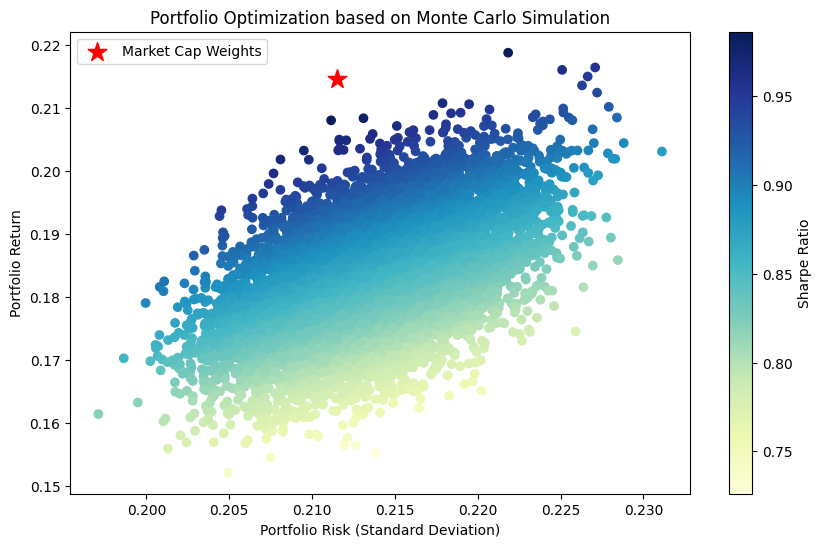

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='YlGnBu', marker='o')
plt.title('Portfolio Optimization based on Monte Carlo Simulation')
plt.xlabel('Portfolio Risk (Standard Deviation)')
plt.ylabel('Portfolio Return')
plt.colorbar(label='Sharpe Ratio')

# Plot the market cap-based portfolio
market_cap_return = np.dot(weights_Market_cap_array, annual_returns)
market_cap_volatility = np.sqrt(np.dot(weights_Market_cap_array.T, np.dot(cov_matrix, weights_Market_cap_array)))

plt.scatter(market_cap_volatility, market_cap_return, color='red', marker='*', s=200, label='Market Cap Weights')
plt.legend()
plt.show()


In [ ]:
# Maximum Sharpe Ratio from Monte Carlo simulation
max_sharpe_idx = np.argmax(results[2])
max_sharpe_return = results[0, max_sharpe_idx]
max_sharpe_volatility = results[1, max_sharpe_idx]

print(f"Maximum Sharpe Ratio Portfolio Return: {max_sharpe_return}")
print(f"Maximum Sharpe Ratio Portfolio Volatility: {max_sharpe_volatility}")

# Market Cap-based Portfolio
print(f"Market Cap-Based Portfolio Return: {market_cap_return}")
print(f"Market Cap-Based Portfolio Volatility: {market_cap_volatility}")

Maximum Sharpe Ratio Portfolio Return: 0.21879853972494692
Maximum Sharpe Ratio Portfolio Volatility: 0.22183926618350727
Market Cap-Based Portfolio Return: 0.21454977529315625
Market Cap-Based Portfolio Volatility: 0.21153304357437902


In [ ]:
# Assume a risk-free rate
risk_free_rate = 0.02

# Market Cap-Based Portfolio Sharpe Ratio
market_cap_sharpe_ratio = (market_cap_return - risk_free_rate) / market_cap_volatility

print(f"Market Cap-Based Portfolio Sharpe Ratio: {market_cap_sharpe_ratio:.2f}")

Market Cap-Based Portfolio Sharpe Ratio: 0.92


In [ ]:
# Risk-Free Rate
risk_free_rate = 0.02

# Maximum Sharpe Ratio Portfolio Sharpe Ratio
max_sharpe_sharpe_ratio = results[2, max_sharpe_idx]

print(f"Maximum Sharpe Ratio Portfolio Sharpe Ratio: {max_sharpe_sharpe_ratio:.2f}")


Maximum Sharpe Ratio Portfolio Sharpe Ratio: 0.99


INFERENCES
1.   The maximun sharpe ratio in the simulated model gives a return of 0.20632353399851275 and volatility of .2077637552602237 whereas the market Cap-Based Portfolio gave a return of 0.21431923243307774 and
volatility of  0.21150097348489774.
2.  On the assumption of risk-free rate at 0.02 we get a max.sharpe ratio of 0.99 whereas the market cap based gives 0.92.
OBSERVATION
1.  The simulated model shows a lower return compared to the market cap but it is compensated by the lower volatility hence better risk balanced portfolio
2.  The higher Sharpe Ratio (0.99) in the simulated model suggests that it offers a better risk-adjusted return compared to the market cap-based portfolio (0.92). This means that the simulated portfolio provides higher returns per unit of risk.
3. All these just denote that there are better optimizable porfolio which can be devised if we change the weighs hence the difference.It just helps to detect the need of optimization or not.

In [8]:
!echo "# RiskandOptimization" >> README.md
!git init
!git add README.md
!git commit -m "first commit"
!git branch -M main
!git remote add origin https://github.com/dipingowda/RiskandOptimization.git
!git push -u origin main


Reinitialized existing Git repository in /content/.git/
[main (root-commit) f8950f5] first commit
 1 file changed, 2 insertions(+)
 create mode 100644 README.md
error: remote origin already exists.
fatal: could not read Username for 'https://github.com': No such device or address


In [9]:
!git config --global user.email "dipingowdam@gmail.com"
!git config --global user.name "dipingowda"
!git push

fatal: The current branch main has no upstream branch.
To push the current branch and set the remote as upstream, use

    git push --set-upstream origin main

